## Text Analytics

### Problem Statement: 
    1.	A dataset which contains the tweets of Apple brands. 
    2.	Use “Tweet” column as an independent variable to predict the user rating (‘Avg’).


    Please solve above mentioned problem with the help of following steps
    
    1: Import required libraries & load the dataset
    
    2: Exploratory data analysis
            Null value removal
            Number of words
            Number of characters
            Average word length
            Number of stopwords
            Number of special characters
            Number of numerics
            Number of uppercase words
            
    3: Basic Text Pre-processing of text data
            Lower casing
            Punctuation removal
            Stopwords removal
            Frequent words removal
            Rare words removal
            Spelling correction
            Tokenization
            Stemming
            Lemmatization
    
    3: Feature engineering
            N-grams
            Term Frequency-Inverse Document Frequency (TF-IDF)
       
    4: Create a word cloud with bi-grams and provide inference coming out of wordcloud
    
    5: Train & Test model
            Concatenate traget variable with tf-idf matrix
            Split data for train & test{ use 80% portion of data for model training and 20% for model testing}
            Train model and check the performance using test data

In [1]:
##Loading libraries
import pandas as pd
import numpy as np
import nltk

In [26]:
## Loading twitter tweet data in form of text
data = pd.read_csv('Customer_review_tweets.csv')
data.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
Tweet    1181 non-null object
Avg      1181 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.5+ KB


## Exploratory data analysis

In [28]:
## Remove null values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 2 columns):
Tweet    1181 non-null object
Avg      1181 non-null float64
dtypes: float64(1), object(1)
memory usage: 27.7+ KB


In [29]:
## Identify Words count 
data['word_count'] = data['Tweet'].apply(lambda x: len(str(x).split(" ")))
data[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


In [30]:
## Identify character count
data['char_count'] = data['Tweet'].str.len() ## this also includes spaces
data[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


In [31]:
## Identify the Average Word Length per tweet
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Tweet'].apply(lambda x: avg_word(x))
data[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


In [32]:
## Identify number of english stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


In [33]:
## Number of special characters
data['hastags'] = data['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


In [34]:
## Number of numerics
data['numerics'] = data['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",0
4,.@apple has the best customer service. In and ...,0


In [35]:
## Number of Uppercase words
data['upper'] = data['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


## Basic Text Pre-processing of text data

In [36]:
## Lower case
data['Tweet'] = data['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

In [37]:
## Removing Punctuation
data['Tweet'] = data['Tweet'].str.replace('[^\w\s]','')
data['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

In [43]:
stop = stopwords.words('english')
if 'not' in stop:
    print('Yes')

Yes


In [38]:
# Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweet'] = data['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

In [39]:
# Common word removal
## 10 most occuring words
freq = pd.Series(' '.join(data['Tweet']).split()).value_counts()[:1]
freq

apple    1297
dtype: int64

In [40]:
## removing  most occured words from text
freq = list(freq.index)
data['Tweet'] = data['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

In [41]:
# Rare words removal
freq = pd.Series(' '.join(data['Tweet']).split()).value_counts()[-1000:]
freq
freq = list(freq.index)
data['Tweet'] = data['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Tweet'].head()

0     say far best customer care service ever appstore
1                           ios 7 beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

In [ ]:
# # Spelling correction
# from textblob import TextBlob
# data['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
# ## Tokenization {dividing the text into a sequence of words or sentences}
# TextBlob(data['Tweet'][1]).words

In [ ]:
# # Stemming {removal of suffices, like “ing”, “ly”, “s”, etc.}
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
# data['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [42]:
# # Lemmatization {converts the word into its root word}
# from textblob import Word
# data['Tweet'] = data['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# data['Tweet'].head()

## Feature engineering 

In [45]:
#  (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data['Tweet'])
train_vect

<1181x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5903 stored elements in Compressed Sparse Row format>

In [48]:
# Sentiment Analysis
from textblob import TextBlob
data['Tweet'][:5].apply(lambda x: TextBlob(x).sentiment)
data['sentiment'] = data['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Tweet','sentiment']].head()

,Tweet,sentiment
0,say far best customer care service ever appstore,0.550000
1,ios 7 beautiful thanxapple,0.850000
2,love u,0.500000
3,thank loving new iphone 5s iphone5s pictwitter...,0.368182
4,best customer service new phone 10min,0.568182


In [49]:
def func_pol(x):
    if x<0:
        return 'Negative'
    elif x>0:
        return 'Positive'
    else:
        return 'Neutral'
    
data['Polarity']=data['sentiment'].apply(lambda x:func_pol(x))
data.head()

,Tweet,Avg,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,Polarity
0,say far best customer care service ever appstore,2.0,19,101,4.368421,6,0,0,2,0.550000,Positive
1,ios 7 beautiful thanxapple,2.0,10,60,5.100000,2,1,1,0,0.850000,Positive
2,love u,1.8,3,13,3.666667,0,0,0,3,0.500000,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,12,91,7.272727,2,2,0,1,0.368182,Positive
4,best customer service new phone 10min,1.8,16,82,4.187500,8,0,0,0,0.568182,Positive


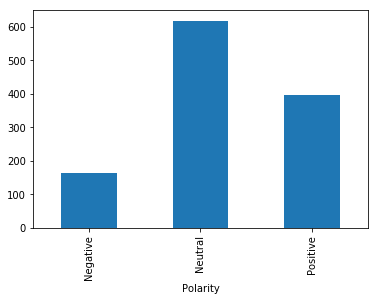

In [51]:
data.groupby(by='Polarity')['Polarity'].count().plot(kind='bar')

In [52]:
## Generating wordcloud from text
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=20, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

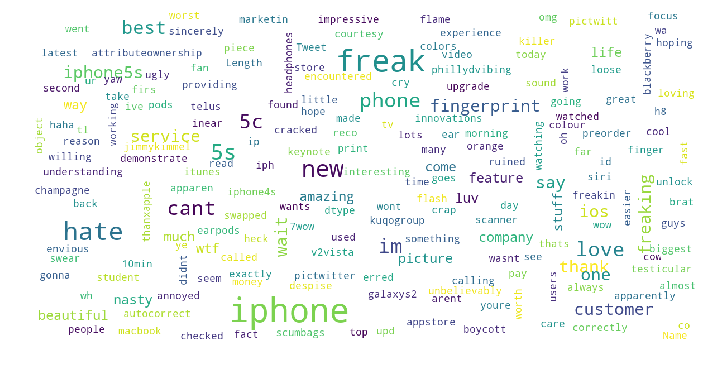

In [53]:
show_wordcloud(data['Tweet'])

In [54]:
data['Tokens']=data['Tweet'].apply(lambda x:TextBlob(x).words)
data.head()

,Tweet,Avg,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment,Polarity,Tokens
0,say far best customer care service ever appstore,2.0,19,101,4.368421,6,0,0,2,0.550000,Positive,"[say, far, best, customer, care, service, ever..."
1,ios 7 beautiful thanxapple,2.0,10,60,5.100000,2,1,1,0,0.850000,Positive,"[ios, 7, beautiful, thanxapple]"
2,love u,1.8,3,13,3.666667,0,0,0,3,0.500000,Positive,"[love, u]"
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,12,91,7.272727,2,2,0,1,0.368182,Positive,"[thank, loving, new, iphone, 5s, iphone5s, pic..."
4,best customer service new phone 10min,1.8,16,82,4.187500,8,0,0,0,0.568182,Positive,"[best, customer, service, new, phone, 10min]"


In [55]:
# creating tf-idf matrix using sklearn

vectorizer = TfidfVectorizer()
vectorizer_ = vectorizer.fit(data['Tweet'])

In [56]:
X = data['Tweet']
Y = data['Avg']
from sklearn.model_selection import train_test_split
# Split the data in test & train for modelling
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(944,) (237,) (944,) (237,)


In [57]:
# Transform the text using TF-IDF Vectorizer
X_train_ = vectorizer_.transform(X_train)
X_test_ = vectorizer_.transform(X_test)
X_train_.shape

(944, 2922)

In [58]:
# required imports
from sklearn.linear_model import LinearRegression
# creating the model 
model = LinearRegression().fit(X_train_, y_train)
print(model)
print('Training Rsquare: ',model.score(X_train_,y_train))

predicted=model.predict(X_test_)
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,predicted)
print('Test MSE: ',mse)
print('Test Rsquare: ',r2_score(y_test,predicted))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Training Rsquare:  0.9974618299389614
Test MSE:  0.29856971302200486
Test Rsquare:  0.32302886528311103


In [59]:
## Check accuracy with SVM
# required imports
from sklearn.svm import SVR
# creating the model for multiclass classification
modelsvr = SVR(kernel='linear').fit(X_train_, y_train)
print(modelsvr)
print('Training Rsquare: ',modelsvr.score(X_train_,y_train))
predict_svr=modelsvr.predict(X_test_)
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,predict_svr)
print('Test MSE: ',mse)
print('Test Rsquare: ',r2_score(y_test,predict_svr))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
Training Rsquare:  0.8910217399660898
Test MSE:  0.2560766385684773
Test Rsquare:  0.41937683219258015


In [ ]:
# To save and load the model
import pickle
filename = 'best_model.pkl'
pickle.dump(modelsvr, open(filename, 'wb'))